In [23]:
# cargar algunas funciones que se utilizarán para simular y graficar
source("../r_scripts/utilities.r")

In [24]:
# dado que la distribución es simétrica, p(mu - sigma <= X <= mu+sigma)
# la región mu-sigma es igual que mu+sigma, por lo tanto, es suficiente
# con restarle a 1 la probabilidad p(mu-sigma <= X) * 2
(1 - (pnorm(-1, mean = 0, sd = 1)) * 2) |> round(3)
(1 - (pnorm(-2, mean = 0, sd = 1)) * 2) |> round(3)
# con 3 sigma cubre el 99 % del espacio
(1 - (pnorm(-3, mean = 0, sd = 1)) * 2) |> round(3)
# la probabilidad de x <= mu-sigma es
1 - (pnorm(1, mean = 0, sd = 1)) |> round(3)
# o equivalentemente
(pnorm(-1, 0, 1)) |> round(3)


[1] 0.683

[1] 0.954

[1] 0.997

[1] 0.159

[1] 0.159

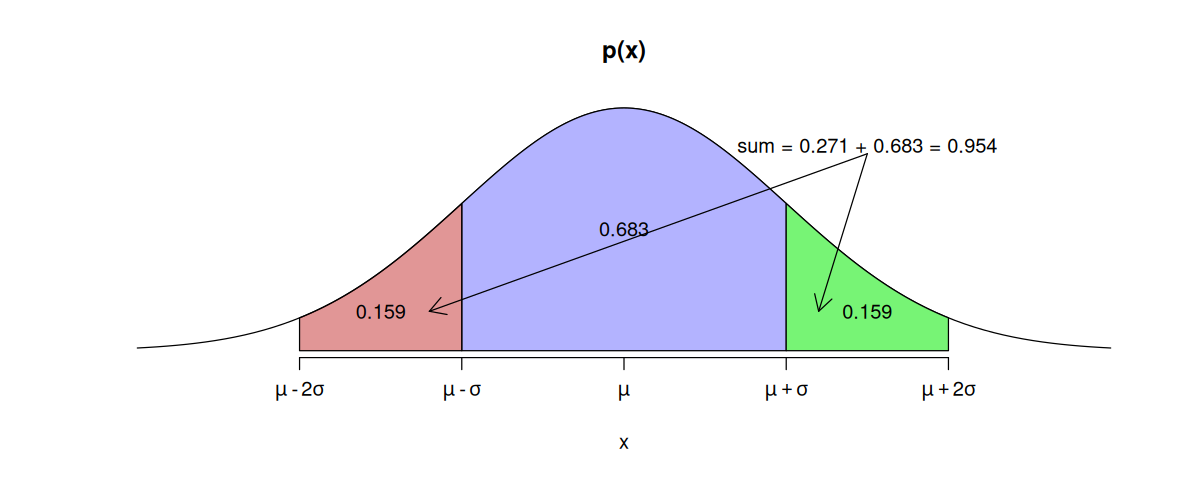

In [25]:
# fijar tamaño de gráficos
options(repr.plot.width = 10, repr.plot.height = 4)
# graficar normal estándar
# colores
red_light <- "#be1b1b75"
blue_light <- "#B3B3FF"
green_light <- "#77f475"
curve(dnorm(x, 0, 1),
  from = -3, to = 3,
  axes = FALSE,
  ylab = "",
  main = "p(x)",
  panel.first = {
    axis(1,
      at = c(-2:2),
      labels = parse(text = c("mu-2*sigma", "mu-sigma", "mu", "mu+sigma", "mu+2*sigma"))
    )
  }
)
# función cargada en utilities.R
# graficar area de x entre [mu-sigma, mu+sigma]
plot_area_normal(
  from_x = -1,
  to_x = 1,
  fill = blue_light
)
# graficar área de mu-2sigma <= x <= mu-sigma
plot_area_normal(
  from_x = -2,
  to_x = -1,
  fill = red_light
)
plot_area_normal(
  from_x = 1,
  to_x = 2,
  fill = green_light
)
# anotación de proporción de la curva
x_lab_pos <- c(-3 / 2, 0, 3 / 2) # posición en x
y_lab_pos <- dnorm(x_lab_pos, 0, 1) / 2 # posición en y
text(
  x = x_lab_pos,
  y = y_lab_pos,
  # a la izquierda de la zona azul es
  labels = c(
    (pnorm(-1, 0, 1)) |> round(3),
    (1 - (pnorm(-1, mean = 0, sd = 1)) * 2) |> round(3),
    (pnorm(-1, 0, 1)) |> round(3)
  )
)
arrows(
  x0 = c(x_lab_pos[1] * 0.8, x_lab_pos[3] * 0.8),
  y0 = c(y_lab_pos[1], y_lab_pos[3]),
  x1 = rep(1.5, 2),
  y1 = dnorm(rep(1.5, 2)) * 2.5,
  length = 0.15,
  code = 1
)
text(
  x = 1.5,
  y = dnorm(1.5) * 2.6,
  label = glue::glue("sum = {(0.954 - 0.683)} + 0.683 = {0.683 + (0.954 - 0.683)}")
)

[,1] [,2]
[1,]  2.0 0.0 
[2,] -4.8 6.4

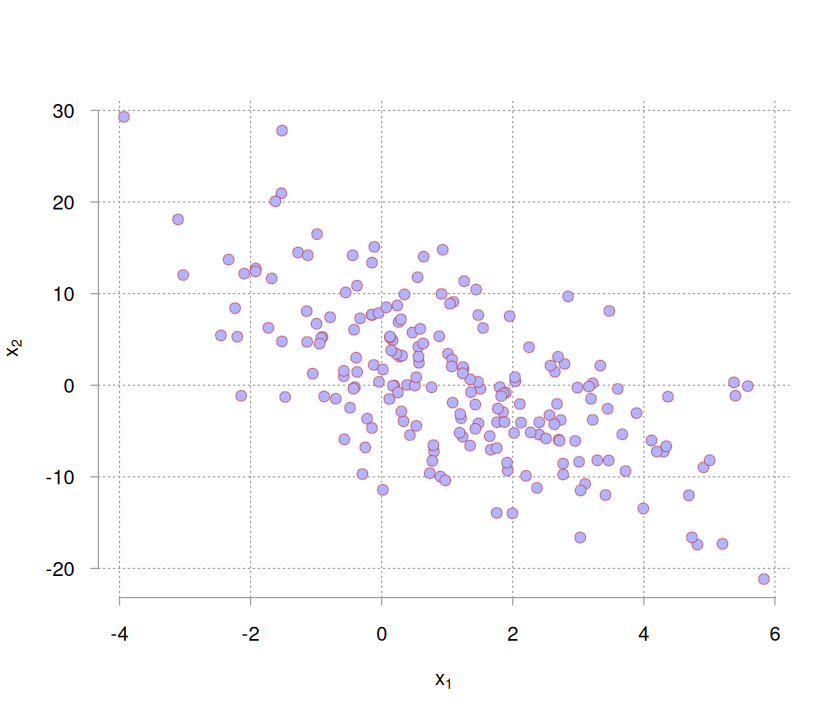

In [26]:
options(repr.plot.width = 7, repr.plot.height = 6)
rho <- -0.6
N <- 200
sigma_1 <- 2
sigma_2 <- 8
# por ecuación 11
Sigma <- matrix( # matriz de covarianza
  c(
    sigma_1^2, rho * sigma_1 * sigma_2,
    rho * sigma_1 * sigma_2, sigma_2^2
  ),
  ncol = 2
)
mu1 <- 1
mu2 <- 1
mu_vec <- c(mu1, mu2)
L <- t(chol(Sigma))
L # matriz triangular
set.seed(123)
u <- matrix(rnorm(2 * N), 2, N) # 2 filas, N/2 columnas
# sumar element-wise, mu1 + col_1, mu2 + col_2
x <- (mu_vec + t(L %*% u))

scatter_plot(
  x[, 1], x[, 2],
  # dos formas diferentes de anotaciones matemáticas
  xlab = parse(text = "x[1]"), ylab = expression(x[2]),
  color = red_light, fill = blue_light
)

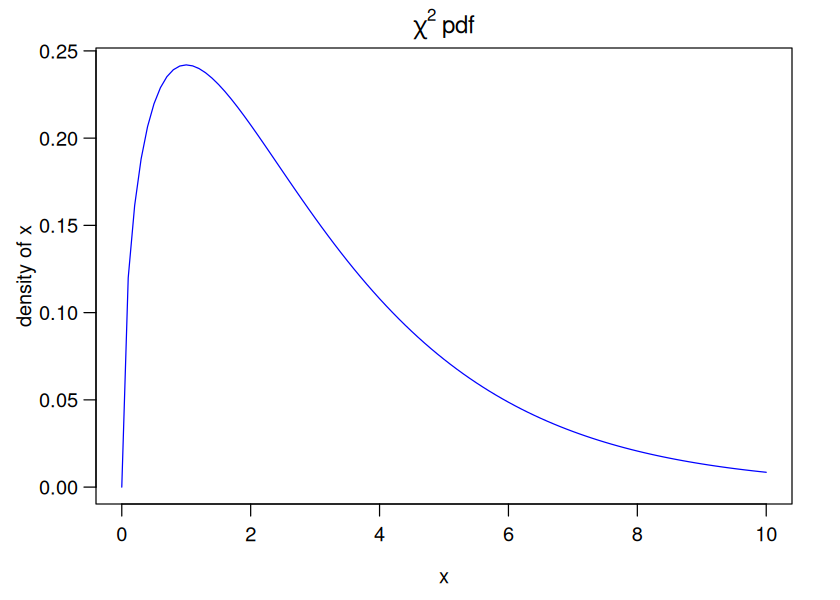

In [3]:
options(repr.plot.width=7, repr.plot.height=5)
par(
  mgp = c(2.5, 0.75, 0),
  mar = c(4, 4, 2, 2),
  las = 1
)
curve(
  dchisq(x, df = 3),
  from = 0, to = 10,
  ylab = 'density of x',
  xlab = 'x',
  main = expression(chi^2~pdf),
  col = 'blue'
)

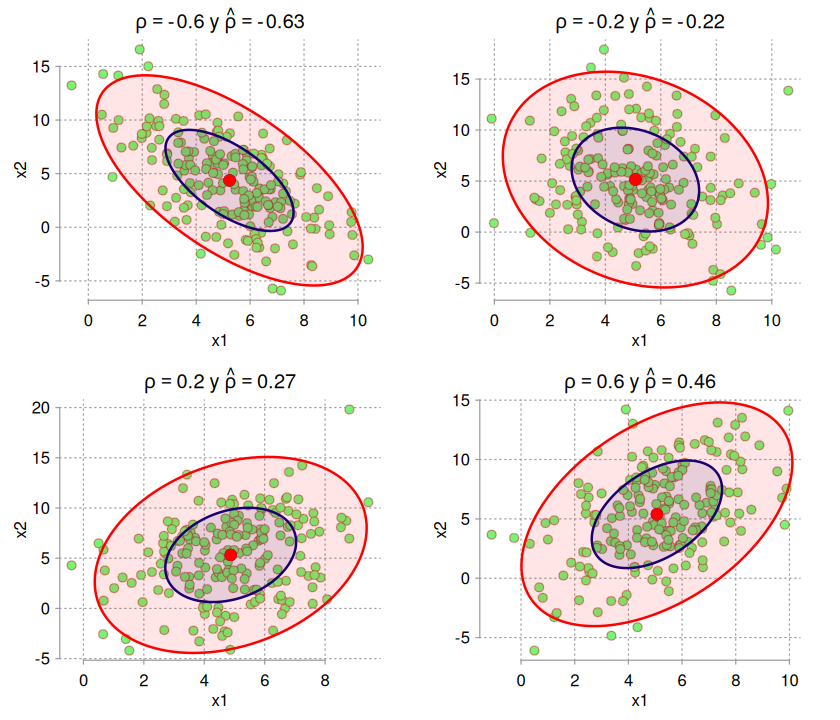

In [28]:
rho_vec <- c(-0.6, -0.2, 0.2, 0.6)
sigma_1 <- 2#
sigma_2 <- 4
sigma_vec <- c(sigma_1, sigma_2)
mu_vec <- c(5, 5)

par(
  mfrow = c(2, 2),
  mgp = c(1.5, 0.5, 0),
  mar = c(3, 3, 2, 2)
)

for (rho in rho_vec) {
  x <- sim_bivariate(rho, sigma_vec, mu_vec, N = 200, seed = 145)
  
  scatter_plot(
    x[, 1], x[, 2],
    xlab = "x1",
    ylab = "x2",
    fill = green_light,
    color = red_light,
    main = parse(text = sprintf("rho == %s~y~hat(rho)==%s", rho, cor(x[, 1], x[, 2]) |> round(2)))
  )

  rad <- qchisq(p = c(0.5, .95), df = ncol(x))
  rad <- sqrt(rad)
  plot_ellipse(x, rad, colores = c("navy", "red"))
}


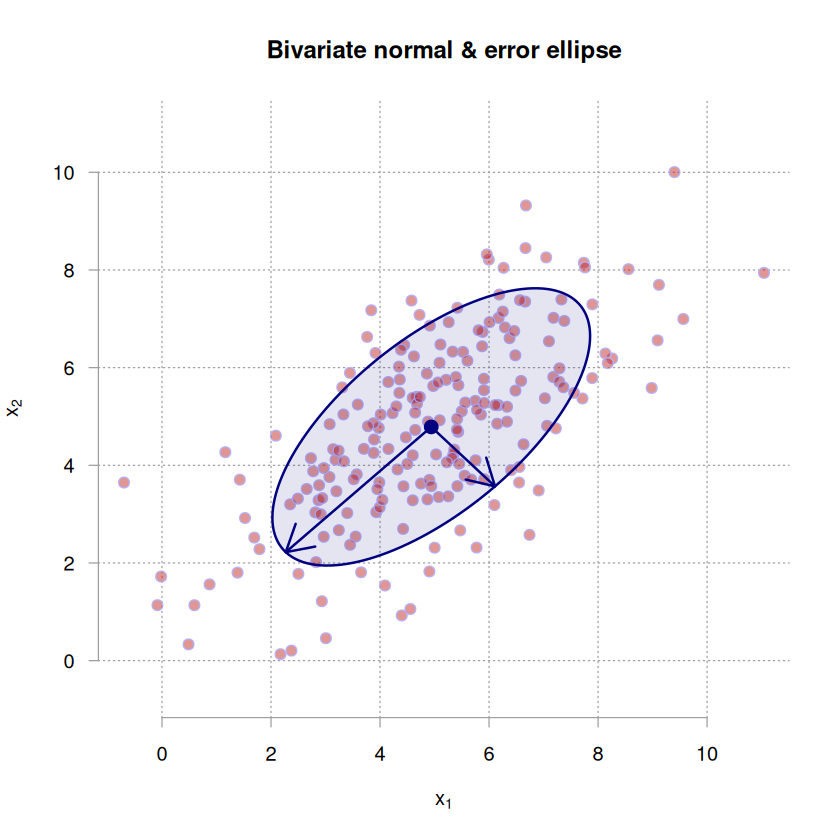

In [29]:
# Ahora veremos cómo se relacionan los eigenvectores y eigenvalores
# con los ejes del elipse
options(repr.plot.width = 7, repr.plot.height = 7)
sigma_1 <- 2
sigma_2 <- 2
mu_vec <- c(5, 5)
x <- sim_bivariate(0.6, c(sigma_1, sigma_2), mu_vec, 200, seed = 123)
scatter_plot(
  x = x[ ,1], y = x[ ,2],
  color = blue_light, fill = red_light,
  xlim = range(x), ylim = range(x),
  main = "Bivariate normal & error ellipse",
  xlab = expression(x[1]), ylab = expression(x[2])
)

rad <- qchisq(p = .95, df = ncol(x))
rad <- sqrt(rad)
# radio a mu + sd, approx 
rad2 <- qchisq(0.6826895, 2) |> sqrt()
plot_ellipse(x, rad2, colores = c('navy', 'red'))
covX <- cov(x)
eigVal <- eigen(covX)$values
eigVec <- eigen(covX)$vectors
# media empírica (vector)
emp_mean <- colMeans(x)
# obtener el eigenvector correspondiente al eigenvalor más largo
max_eigen_val_index <- which.max(eigVal)
max_eigVal <- eigVal[max_eigen_val_index]
max_eigVec <- eigVec[, max_eigen_val_index]
# correspondiente al eigenvalor más corto
min_eigVal <- eigVal[-max_eigen_val_index]
min_eigVec <- eigVec[ ,-max_eigen_val_index]
# dibujar el eje mayor
arrows(
  # x0, y0
  emp_mean[1], emp_mean[2],
  # x1
  emp_mean[1] + sqrt(max_eigVal) * max_eigVec[1] * rad2, 
  # y1
  emp_mean[2] + sqrt(max_eigVal) * max_eigVec[2] * rad2,
  col = 'navy',
  lwd = 2
)
# dibujar el eje menor
arrows(
  emp_mean[1], emp_mean[2],
  emp_mean[1] + sqrt(min_eigVal) * min_eigVec[1] * rad2,
  emp_mean[2] + sqrt(min_eigVal) * min_eigVec[2] * rad2,
  col = "navy",
  lwd = 2
)

In [30]:
# En R lo anterior sería
# matriz inversa
Sinv <- matrix(c(3.7, -2.4, -2.4, 2.5), ncol = 2, byrow = TRUE)
# vector centroide
mu <- c(3.1, 3)
# distancia euclideana p1
p1 <- as.matrix(c(5, 5))
norm(p1-mu, type = '2')
p2 <- as.matrix(c(5, 2))
norm(p2 - mu, type = "2")
# d de Malahanobis de p1; %*% es el producto punto, t(x) es la traspuesta de x
sqrt(t(p1-mu) %*% Sinv %*% (p1-mu))
# d de Malahanobis de p2
sqrt(t(p2-mu) %*% Sinv %*% (p2-mu))

[1] 2.758623

[1] 2.147091

[,1]    
[1,] 2.262079

[,1]    
[1,] 4.997699

In [31]:
d_teorico_cuadratico <- qchisq(1 - 0.05, 2)
sqrt(d_teorico_cuadratico)

[1] 2.447747

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.
ℹ The deprecated feature was likely used in the ggExtra package.
  Please report the issue at <https://github.com/daattali/ggExtra/issues>.”


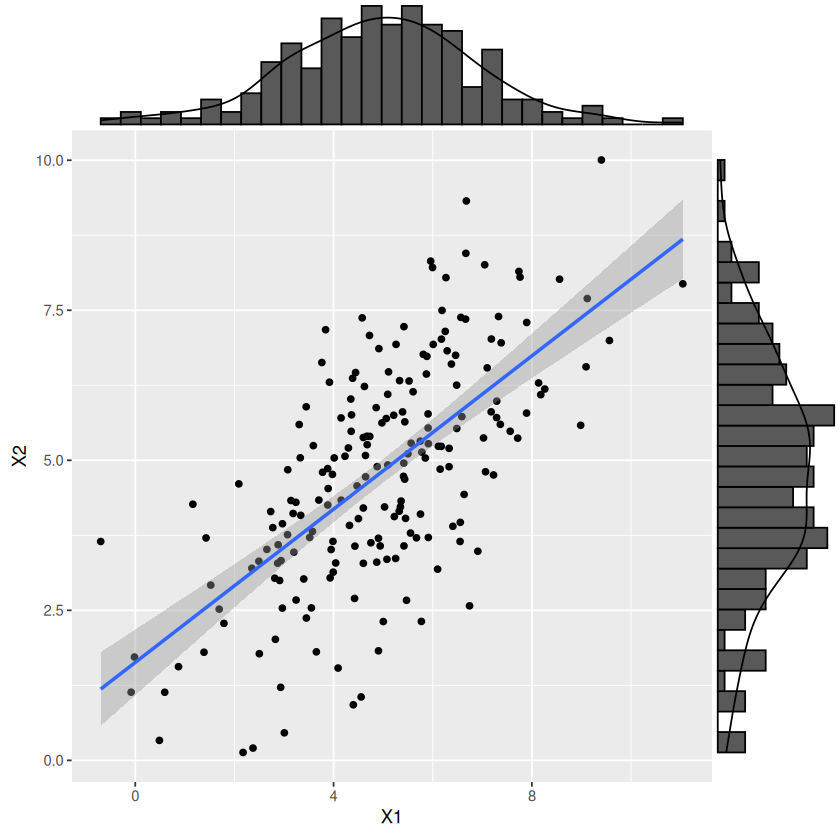

In [32]:
library(tidyverse)
library(ggExtra)

colnames(x) <- c("X1", "X2")

p_scatter <- ggplot(
  x |> as.data.frame(),
  aes(x = X1, y = X2)
) +
  geom_point() +
  geom_smooth(method = "lm")

ggMarginal(p_scatter, type = "densigram")


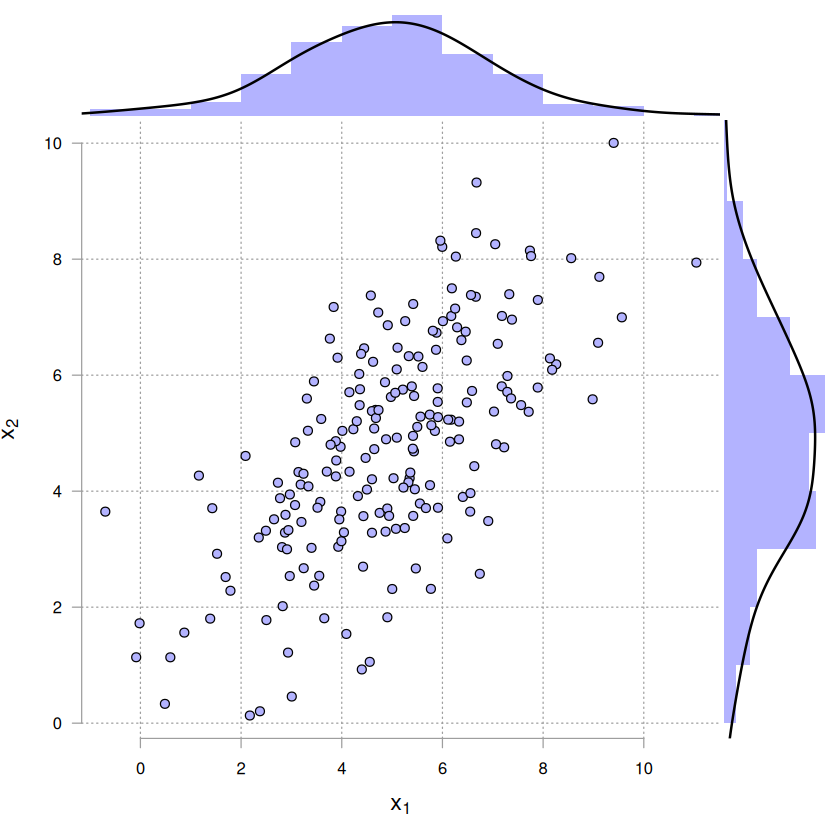

In [34]:
# revisar el código del script utilities.r
scatter_marginal(
  x = x[, 1], y = x[, 2],
  fill = blue_light, color = 1,
  xlab = expression(x[1]), 
  ylab = expression(x[2]),
  cex.lab = 1.4
)